In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


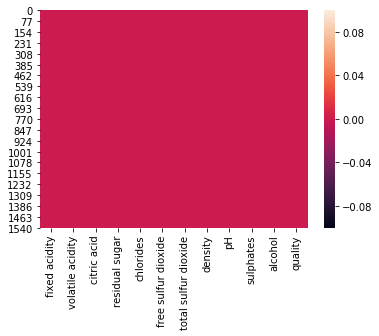

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


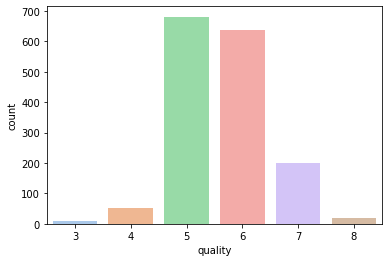

In [10]:
sns.countplot(df.quality,palette='pastel')

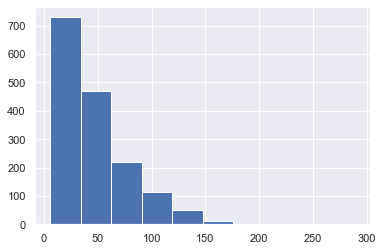

In [11]:
sns.set()
df['total sulfur dioxide'].hist()

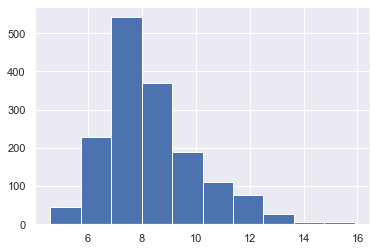

In [12]:
sns.set()
df['fixed acidity'].hist()

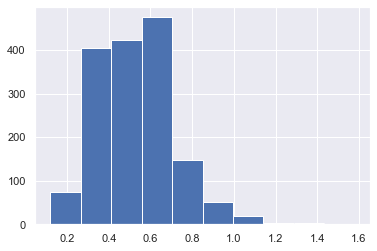

In [13]:
sns.set()
df['volatile acidity'].hist()

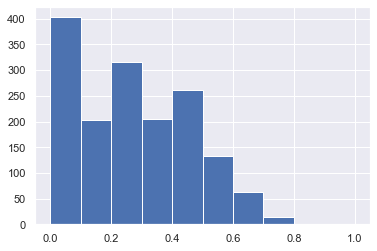

In [14]:
df['citric acid'].hist()

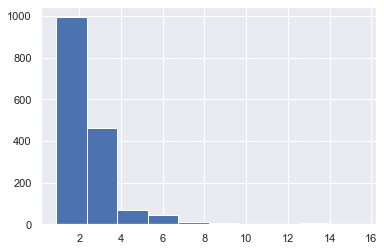

In [15]:
df['residual sugar'].hist()

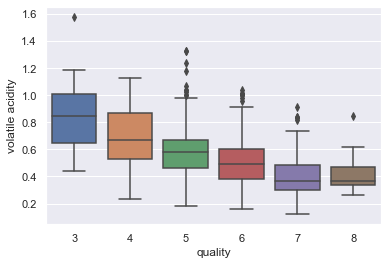

In [16]:
sns.boxplot('quality','volatile acidity',data=df)

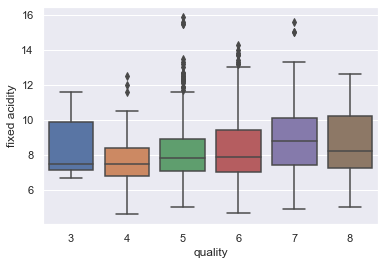

In [17]:
sns.boxplot('quality','fixed acidity',data=df)

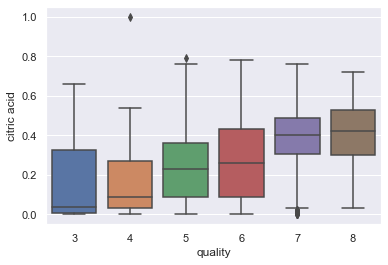

In [18]:
sns.boxplot('quality','citric acid',data=df)

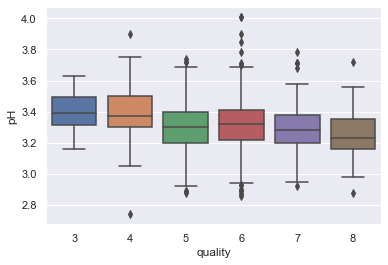

In [19]:
sns.boxplot('quality','pH',data=df)

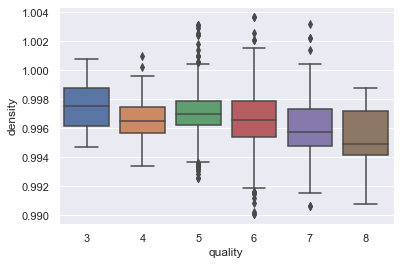

In [20]:
sns.boxplot('quality','density',data=df)

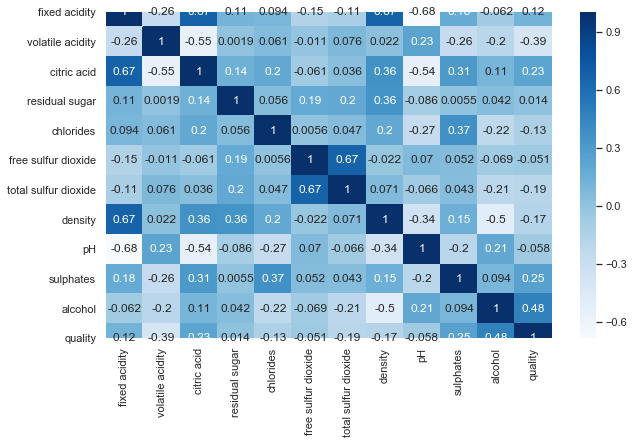

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

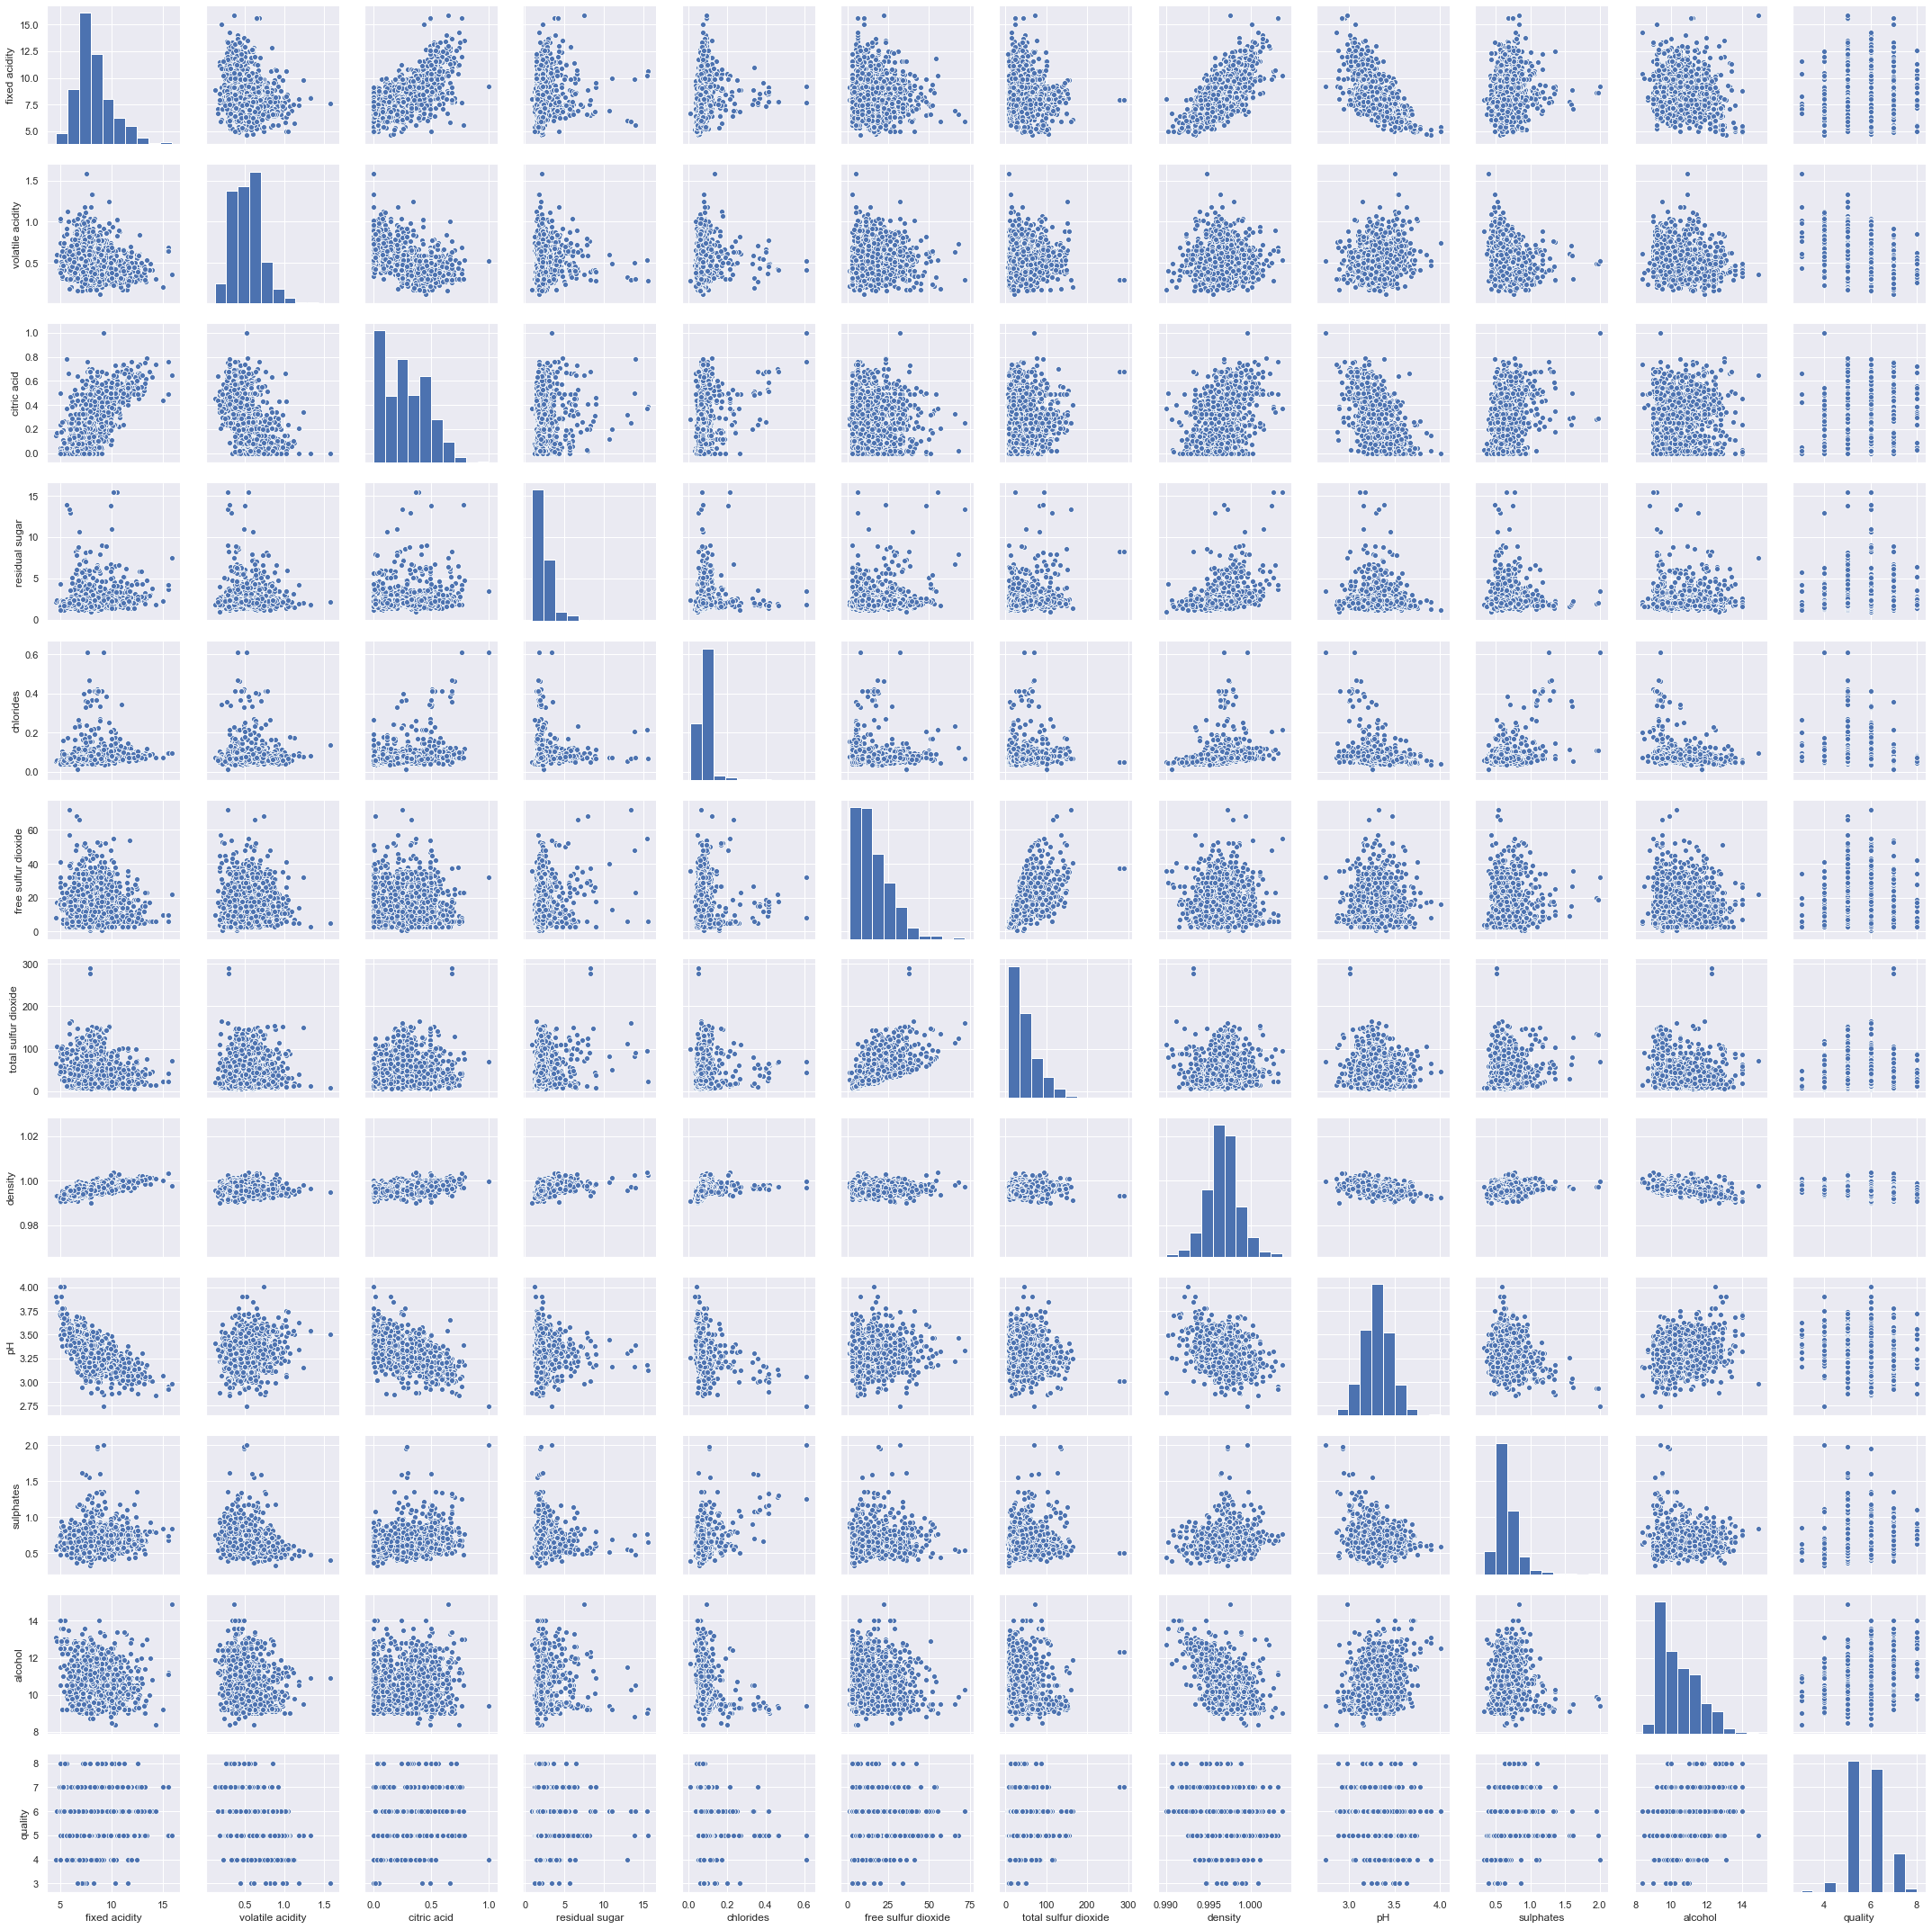

In [22]:
sns.pairplot(df)

In [23]:
x=df.iloc[:,0:11]
y=df.iloc[:,11]

In [24]:
x.shape,y.shape

((1599, 11), (1599,))

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [27]:
# Building Basic Neural Network Model

In [28]:
model=Sequential()
model.add(Dense(64,init='uniform',activation='relu',input_dim=xtrain.shape[1]))
model.add(Dense(32,init='uniform',activation='relu'))
model.add(Dense(1,init='uniform'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
model.fit(xtrain,ytrain,epochs=200,batch_size=10,verbose=1)

C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", input_dim=11, kernel_initializer="uniform")`
  
C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wallace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Epoch 1/200
1279/1279 [==============================] - 1s 579us/step - loss: 14.1038 - mse: 14.1038
Epoch 2/200
1279/1279 [==============================] - 0s 242us/step - loss: 1.2654 - mse: 1.2654
Epoch 3/200
1279/1279 [==============================] - 0s 239us/step - loss: 0.7489 - mse: 0.7489
Epoch 4/200
1279/1279 [==============================] - 0s 191us/step - loss: 0.5764 - mse: 0.5764
Epoch 5/200
1279/1279 [==============================] - 0s 192us/step - loss: 0.5029 - mse: 0.5029
Epoch 6/200
1279/1279 [==============================] - 0s 159us/step - loss: 0.4929 - mse: 0.4929
Epoch 7/200
1279/1279 [==============================] - 0s 154us/step - loss: 0.4790 - mse: 0.4790
Epoch 8/200
1279/1279 [==============================] - 0s 252us/step - loss: 0.4687 - mse: 0.4687
Epoch 9/200
1279/1279 [==============================] - 0s 329us/step - loss: 0.4596 - mse: 0.4596
Epoch 10/200
1279/1279 [==============================] - 0s 155us/step - loss: 0.4599 - mse: 0.45

1279/1279 [==============================] - 0s 169us/step - loss: 0.4110 - mse: 0.4110
Epoch 82/200
1279/1279 [==============================] - 0s 148us/step - loss: 0.4068 - mse: 0.4068
Epoch 83/200
1279/1279 [==============================] - 0s 178us/step - loss: 0.4056 - mse: 0.4056
Epoch 84/200
1279/1279 [==============================] - 0s 169us/step - loss: 0.4031 - mse: 0.4031
Epoch 85/200
1279/1279 [==============================] - 0s 230us/step - loss: 0.4055 - mse: 0.4055
Epoch 86/200
1279/1279 [==============================] - 0s 233us/step - loss: 0.4017 - mse: 0.4017
Epoch 87/200
1279/1279 [==============================] - 0s 167us/step - loss: 0.4050 - mse: 0.4050
Epoch 88/200
1279/1279 [==============================] - 0s 151us/step - loss: 0.4025 - mse: 0.4025
Epoch 89/200
1279/1279 [==============================] - 0s 174us/step - loss: 0.4047 - mse: 0.4047
Epoch 90/200
1279/1279 [==============================] - 0s 145us/step - loss: 0.3952 - mse: 0.3952
Epo

1279/1279 [==============================] - 0s 130us/step - loss: 0.3422 - mse: 0.3422
Epoch 162/200
1279/1279 [==============================] - 0s 209us/step - loss: 0.3542 - mse: 0.3542
Epoch 163/200
1279/1279 [==============================] - 0s 280us/step - loss: 0.3507 - mse: 0.3507
Epoch 164/200
1279/1279 [==============================] - 0s 134us/step - loss: 0.3524 - mse: 0.3524
Epoch 165/200
1279/1279 [==============================] - 0s 122us/step - loss: 0.3518 - mse: 0.3518
Epoch 166/200
1279/1279 [==============================] - 0s 134us/step - loss: 0.3427 - mse: 0.3427
Epoch 167/200
1279/1279 [==============================] - 0s 131us/step - loss: 0.3420 - mse: 0.3420
Epoch 168/200
1279/1279 [==============================] - 0s 124us/step - loss: 0.3525 - mse: 0.3525
Epoch 169/200
1279/1279 [==============================] - 0s 232us/step - loss: 0.3488 - mse: 0.3488
Epoch 170/200
1279/1279 [==============================] - 0s 208us/step - loss: 0.3438 - mse: 0

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [30]:
mse_value,mae_value=model.evaluate(xtest,ytest,verbose=1)

320/320 [==============================] - 0s 811us/step


In [31]:
print(mse_value)

0.3887451946735382


In [32]:
pred=model.predict(xtest)

In [33]:
print('R-Score: ',r2_score(ytest,pred))

R-Score:  0.4051389347993576
